### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
features_w_na = ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
print(data[features_w_na])

print(data[features_w_na].apply(pd.value_counts))


       car    Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50
0      NaN  never       never       NaN                  4~8              1~3
1      NaN  never       never       NaN                  4~8              1~3
2      NaN  never       never       NaN                  4~8              1~3
3      NaN  never       never       NaN                  4~8              1~3
4      NaN  never       never       NaN                  4~8              1~3
...    ...    ...         ...       ...                  ...              ...
12679  NaN  never       never       1~3                  4~8              1~3
12680  NaN  never       never       1~3                  4~8              1~3
12681  NaN  never       never       1~3                  4~8              1~3
12682  NaN  never       never       1~3                  4~8              1~3
12683  NaN  never       never       1~3                  4~8              1~3

[12684 rows x 6 columns]
                                      

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# car data is useless, remove it
datac = data.drop('car', axis=1)

# Replace NaN data with 'never'
features_w_na = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
datac[features_w_na] = datac[features_w_na].fillna('never')

datac.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [8]:
print(datac['Y'].value_counts())
print(datac['Y'].value_counts(normalize=True))

print(datac.query('Y == 1')[['Y']].sum().iloc[0] / len(data))

1    7210
0    5474
Name: Y, dtype: int64
1    0.568433
0    0.431567
Name: Y, dtype: float64
0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

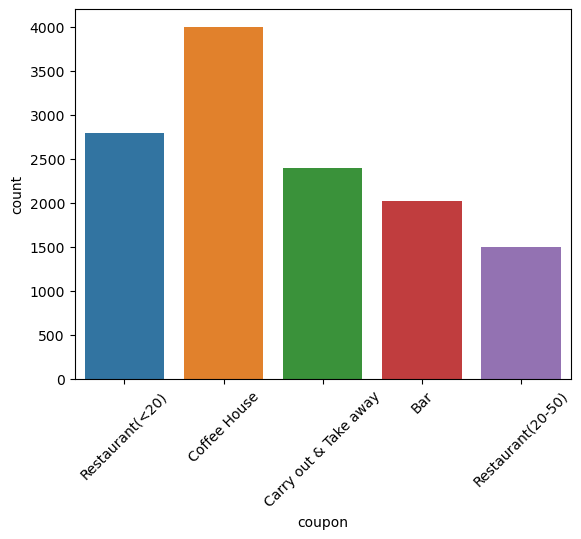

In [9]:
coupon_counts = datac['coupon'].value_counts()
print(coupon_counts)

sns.countplot(data=datac, x='coupon')
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

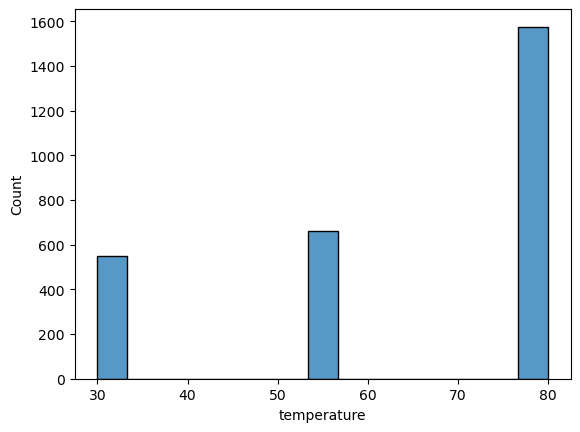

In [10]:
rest_lt20 = datac[datac['coupon'] == 'Restaurant(<20)']
sns.histplot(data=rest_lt20, x='temperature')

<AxesSubplot:xlabel='temperature', ylabel='Count'>

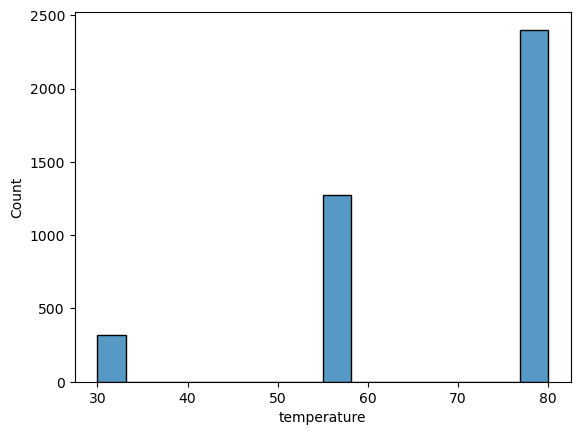

In [11]:
coffee_house = datac[datac['coupon'] == 'Coffee House']
sns.histplot(data=coffee_house, x='temperature')

<AxesSubplot:xlabel='temperature', ylabel='Count'>

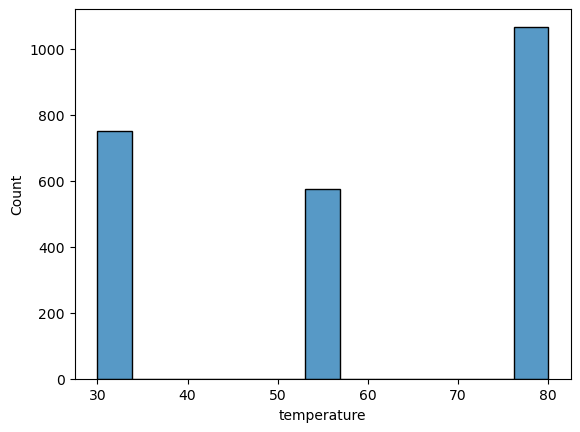

In [12]:
carry_take = datac[datac['coupon'] == 'Carry out & Take away']
sns.histplot(data=carry_take, x='temperature')

<AxesSubplot:xlabel='temperature', ylabel='Count'>

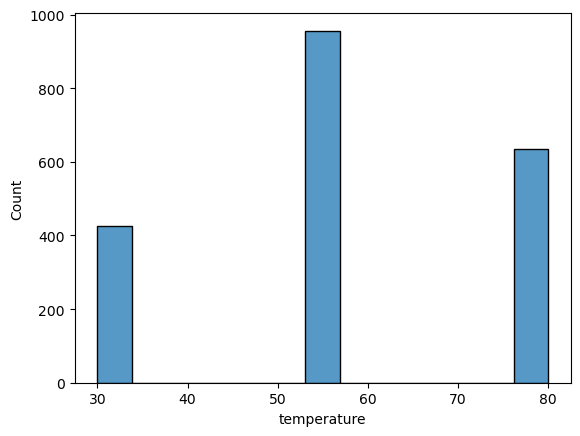

In [13]:
barc = datac[datac['coupon'] == 'Bar']
sns.histplot(data=barc, x='temperature')

<AxesSubplot:xlabel='temperature', ylabel='Count'>

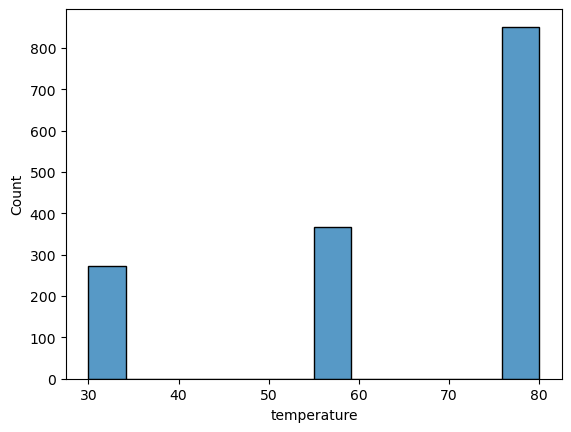

In [14]:
rest20to50 = datac[datac['coupon'] == 'Restaurant(20-50)']
sns.histplot(data=rest20to50, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
barc = datac[datac['coupon'] == 'Bar']
barc['Bar'].value_counts()

never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: Bar, dtype: int64

2. What proportion of bar coupons were accepted?


In [11]:
print(barc.query('Y == 1')[['Y']].sum().iloc[0] / len(barc))

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [75]:
def print_accept_rate(str, dn, dd):
    print("%s: %d / %d = %f" % (str, len(dn), len(dd), len(dn) / len(dd)))

def plot_accept_rate(df, subp):
    name_map = { 0 : 'Not Accept', 1 : "Accept"}
    palette = { "Accept" : "green", "Not Accept" : "Red"}
    plt.subplot(subp)
    # Try a seaborn bar plot
    bvc = df['Y'].map(name_map).value_counts(normalize=True)
    bvc = bvc.sort_index()
    fig = sns.barplot(x=bvc.sort_index().index, y=bvc.values, palette=palette)

    # Found way to annotate values to the bars
    for i in fig.containers:
        fig.bar_label(i,)
        
# get those that are in the 'Bar' column >3
barc_gt3 = barc[(barc['Bar'] == '4~8') | (barc['Bar'] == 'gt8')]
barc_lte3 = barc.drop(barc_gt3.index, axis=0)

# get the accepted coupons Y == 1
barc_gt3_accept = barc_gt3[barc_gt3['Y'] == 1]
barc_lte3_accept = barc_lte3[barc_lte3['Y'] == 1]

print_accept_rate("Accept >3 per month", barc_gt3_accept, barc_gt3)
print_accept_rate("Accept <=3 per month", barc_lte3_accept, barc_lte3)

Accept >3 per month: 153 / 199 = 0.768844
Accept <=3 per month: 674 / 1818 = 0.370737


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:
# discovered a data issue with 50plus and below21
print(data['age'].value_counts())

# To make this easier, change 50plus to 50 and below21 to 20
barc_agec = []
barc_agec = barc
barc_agec['age'] = barc_agec['age'].str.replace('50plus', '50')
barc_agec['age'] = pd.to_numeric(barc_agec['age'].str.replace('below21', '20'))



21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64


C:\Users\bwals\AppData\Local\Temp\ipykernel_16528\3517295444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barc_agec['age'] = barc_agec['age'].str.replace('50plus', '50')
C:\Users\bwals\AppData\Local\Temp\ipykernel_16528\3517295444.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barc_agec['age'] = pd.to_numeric(barc_agec['age'].str.replace('below21', '20'))


21    417
26    395
31    339
50    283
36    209
41    178
46    109
20     87
Name: age, dtype: int64
Accept >1 per month >25 years: 292 / 420 = 0.695238
Accept !(>1 per month >25 years): 535 / 1597 = 0.335003


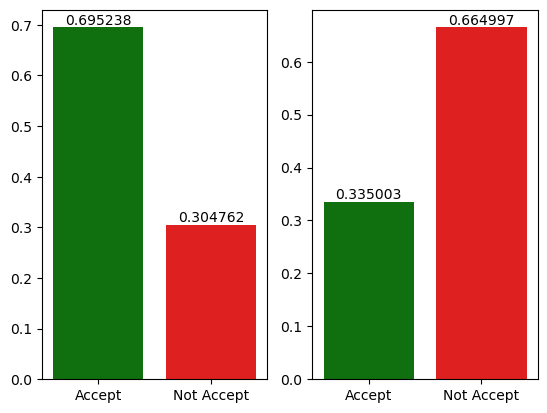

In [76]:
print(barc_agec['age'].value_counts())

# calculating those that go to the bar >1 times per month and over 25 years
barc_gt1 = barc_agec[(barc_agec['Bar'] == '4~8') | (barc_agec['Bar'] == 'gt8') | (barc_agec['Bar'] == '1~3')]
barc_gt1m_gt25y = barc_gt1[barc_gt1['age'] > 25]
barc_gt1m_gt25y_accept = barc_gt1m_gt25y.query('Y == 1')

print_accept_rate("Accept >1 per month >25 years", barc_gt1m_gt25y_accept, barc_gt1m_gt25y)

# the problem states "all others", but I think they mean those not in this category
barc_not_gt1m_gt25y = barc_agec.drop(barc_gt1m_gt25y.index, axis=0)
barc_not_gt1m_gt25y_accept = barc_not_gt1m_gt25y.query('Y == 1')

print_accept_rate("Accept !(>1 per month >25 years)", barc_not_gt1m_gt25y_accept, barc_not_gt1m_gt25y)

plot_accept_rate(barc_gt1m_gt25y, 121)       
plot_accept_rate(barc_not_gt1m_gt25y, 122)       


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Alone        356
Friend(s)    120
Partner       75
Kid(s)        45
Name: passanger, dtype: int64
Alone        356
Friend(s)    120
Partner       75
Name: passanger, dtype: int64
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering           

<AxesSubplot:>

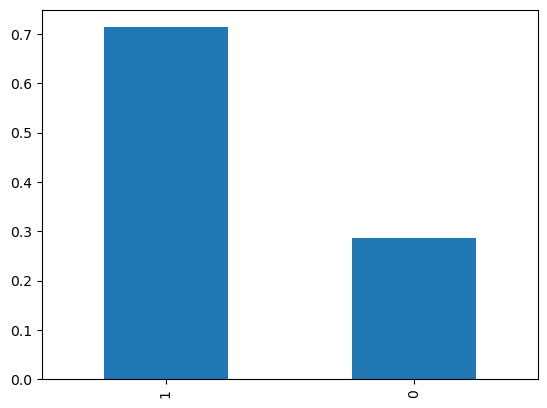

In [37]:
# Already calculated drivers >1 month with barc_gt1

# Check for passenger values
print(barc_gt1['passanger'].value_counts())

# Get no kid passengers by removing Kids(s)
barc_gt1_nokids = barc_gt1.drop(barc_gt1[barc_gt1['passanger'] == 'Kid(s)'].index, axis=0)
print(barc_gt1_nokids['passanger'].value_counts())

# Get farming/fishing/forestry, then drop them
# but I don't see any farming fishing forestry after kids are dropped
print(barc['occupation'].value_counts())
print(barc[barc['occupation'] == 'Farming Fishing & Forestry'][['Bar', 'passanger']])

# Actually there are no farming, fishing, forestry >1 month
print(">1 occupation FFF?", barc_gt1[barc_gt1['occupation'] == 'Farming Fishing & Forestry'])

# Acceptance rate of >1 month without kids, without FFF
print(barc_gt1_nokids['Y'].value_counts(normalize=True))
barc_gt1_nokids['Y'].value_counts(normalize=True).plot(kind="bar")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  